# Tutorial with wine_quality dataset from imbalanced learn

### Installing the library

In [1]:
#Installing algorithm files from GitHub
!pip install git+https://github.com/ZhibekZhetpisbay/NAUS_algorithm.git

  Cloning https://github.com/ZhibekZhetpisbay/NAUS_algorithm.git to c:\users\жибек\appdata\local\temp\pip-req-build-sv9i0not
  Resolved https://github.com/ZhibekZhetpisbay/NAUS_algorithm.git to commit ab488eee314bbc13190d3102efc7a2cdf79e5b24
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/ZhibekZhetpisbay/NAUS_algorithm.git 'C:\Users\Жибек\AppData\Local\Temp\pip-req-build-sv9i0not'


In [2]:
#Importing an installed library
import NAUS_code

### Data Loading and Preprocessing

In [3]:
from collections import Counter
from imblearn.datasets import fetch_datasets
wine_quality = fetch_datasets()['wine_quality']
wine_quality.data.shape

(4898, 11)

In [4]:
import pandas as pd
import numpy as np
df = pd.DataFrame(wine_quality.data, columns=[f'feature_{i}' for i in range(wine_quality.data.shape[1])])
df['target'] = wine_quality.target
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,-1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,-1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,-1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,-1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,-1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,-1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,-1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,-1


In [5]:
df['target'].value_counts()

target
-1    4715
 1     183
Name: count, dtype: int64

In [6]:
df.target.replace({-1:0},inplace=True)
df

C:\Users\Жибек\AppData\Local\Temp\ipykernel_15756\33722527.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.target.replace({-1:0},inplace=True)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


### Application of the NAUS Algorithm

C:\conda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\conda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


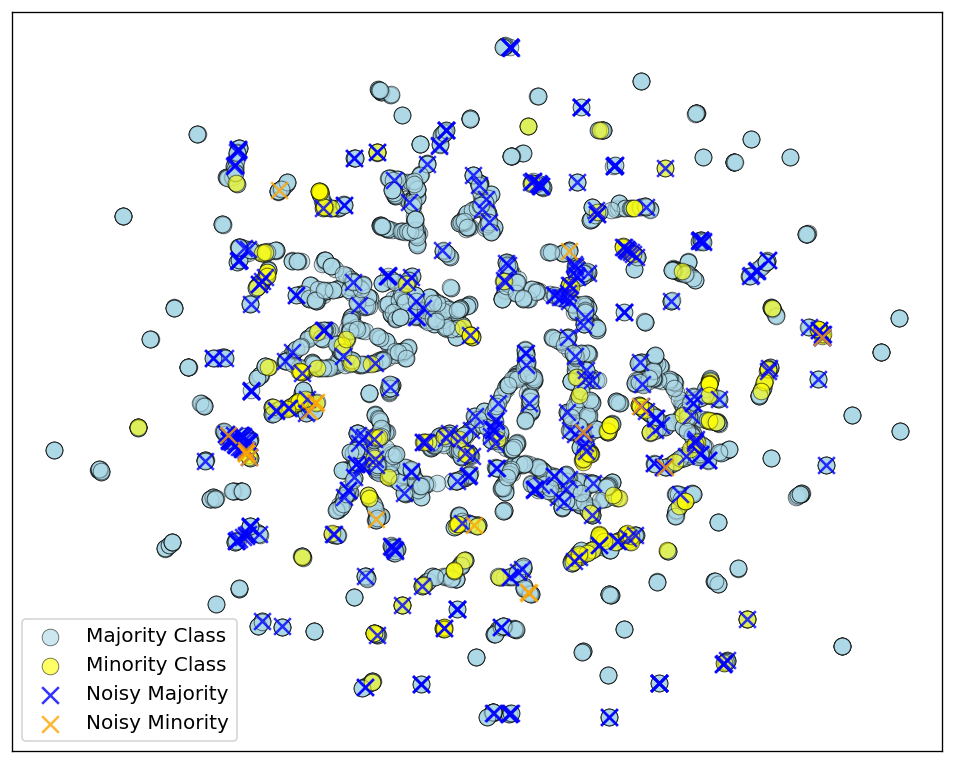

C:\conda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


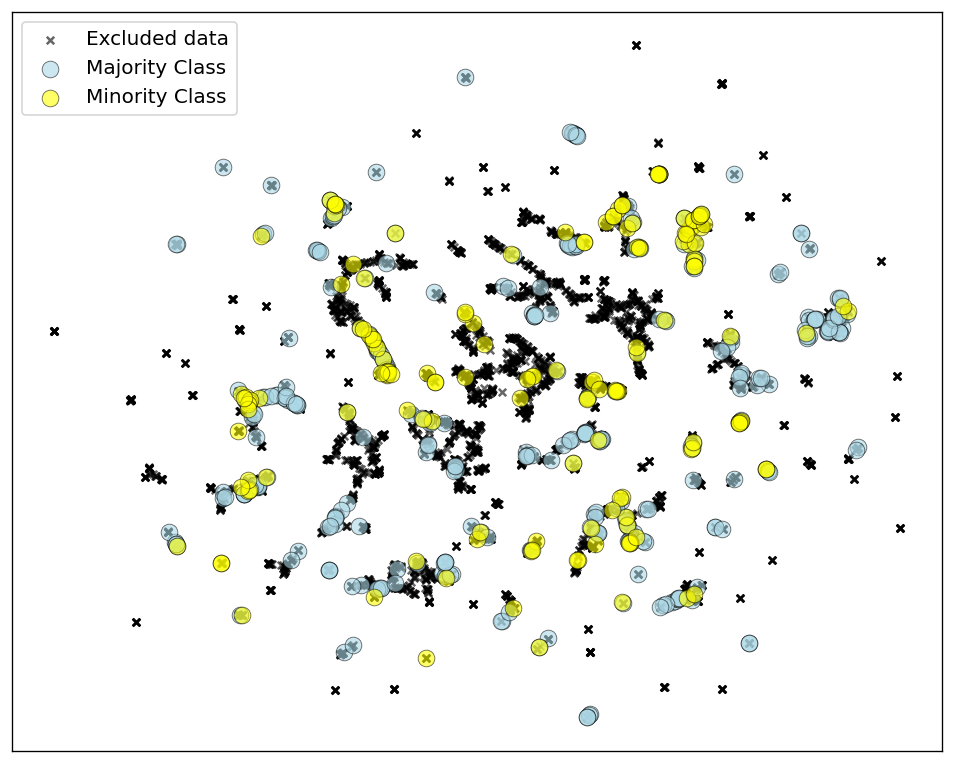

In [7]:
features = df.columns.drop("target")
processor = NAUS_code.DataProcessor(df, class_col="target", feature_cols=features)

# Step 1: Calculate posterior probabilities
processor.calculate_posterior_probabilities()

# Step 2: Apply TACF for noise removal
processor.compute_tacf(threshold_type='std', threshold_value=2, min_features=2)
processor.visualize(title="UMAP Projection After Noise Removal",mode ='noise')
# Step 3: Undersample the majority class
result = processor.undersample(maj_class=0, gamma=1.0, ratio=0.5)

# Step 4: Visualize the results
processor.visualize(title="UMAP Projection After Undersampling", mode='undersampling')

In [8]:
# Removal of Redundant Features Generated During Computation
result = result.iloc[:,:-3]
df=df.iloc[:,:-3]
result

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
11,8.6,0.230,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,0
18,7.4,0.340,0.42,1.10,0.033,17.0,171.0,0.99170,3.12,0.53,11.3,0
30,8.5,0.240,0.39,10.40,0.044,20.0,142.0,0.99740,3.20,0.53,10.0,0
34,5.8,0.270,0.20,14.95,0.044,22.0,179.0,0.99620,3.37,0.37,10.2,0
43,6.6,0.240,0.27,1.40,0.057,33.0,152.0,0.99340,3.22,0.56,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4774,7.1,0.240,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,1
4779,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,1
4804,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1,1
4839,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,1


In [9]:
# Class Ratio in the Final Dataset
result['target'].value_counts()

target
0    328
1    164
Name: count, dtype: int64

### Model Training

In [10]:
train = NAUS_code.ModelTraining()
# Random forest on original data
Before_rndf=train.rndf_weights(df,16,33,42,'original',2)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9375, AUC: 0.8685, Precision: 0.2482, Recall: 0.4096
Fold 2 - Accuracy: 0.9429, AUC: 0.8283, Precision: 0.2330, Recall: 0.2857

Test Data Evaluation - Accuracy: 0.6250, AUC: 0.8242, Precision: 1.0000, Recall: 0.2500


In [11]:
# Random forest on undersampled with NAUS data
NAUS_rndf=train.rndf_weights(result,16,33,42,'undersampled',2)

Training set:
target
0    312
1    148
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.7652, AUC: 0.8128, Precision: 0.7632, Recall: 0.3919
Fold 2 - Accuracy: 0.7348, AUC: 0.7976, Precision: 0.6102, Recall: 0.4865

Test Data Evaluation - Accuracy: 0.8438, AUC: 0.8594, Precision: 0.8667, Recall: 0.8125


In [12]:
# LightGBM on original data
Before_lgbm=train.lgbm_weights(df,16,33,29,'original',2)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.0712667	valid_1's binary_logloss: 0.148376
[20]	training's binary_logloss: 0.0480147	valid_1's binary_logloss: 0.14354
[30]	training's binary_logloss: 0.032214	valid_1's binary_logloss: 0.145749
Early stopping, best iteration is:
[21]	training's binary_logloss: 0.0458211	valid_1's binary_logloss: 0.143197
Fold 1 - Accuracy: 0.9425, AUC: 0.8133, Precision: 0.2478, Recall: 0.3373
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.0828121	valid_1's binary_logloss: 0.144986
[20]	training's binary_logloss: 0.0569307	valid_1's binary_logloss: 0.134724
[30]	training's binary_logloss: 0.0378565	valid_1's binary_logloss: 0.129696
[40]	training's binary_logloss: 0.0241792	valid_1's binary_logloss: 0.127153
[50]	training's binary_loglo

In [13]:
# LightGBM on undersampled with NAUS data
NAUS_lgbm=train.lgbm_weights(result,16,33,29,'undersampled',2)

Training set:
target
0    312
1    148
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.405144	valid_1's binary_logloss: 0.536812
[20]	training's binary_logloss: 0.297393	valid_1's binary_logloss: 0.518221
[30]	training's binary_logloss: 0.223808	valid_1's binary_logloss: 0.517641
Early stopping, best iteration is:
[24]	training's binary_logloss: 0.264369	valid_1's binary_logloss: 0.516059
Fold 1 - Accuracy: 0.7739, AUC: 0.7851, Precision: 0.6447, Recall: 0.6622
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.410469	valid_1's binary_logloss: 0.520071
[20]	training's binary_logloss: 0.289991	valid_1's binary_logloss: 0.517231
Early stopping, best iteration is:
[18]	training's binary_logloss: 0.309196	valid_1's binary_logloss: 0.509532
Fold 2 - Accuracy: 0.7957, AUC: 0.7726, Precision: 0.8462, Recall: 0.4459

Te

In [14]:
# MLP on original data
Before_mlp=train.mlp_weight(df,13,18,42)

Training set:
target
0    4702
1     170
Name: count, dtype: int64

Test set:
target
0    13
1    13
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9655, AUC: 0.8136, Precision: 1.0000, Recall: 0.0118
Fold 2 - Accuracy: 0.9626, AUC: 0.7923, Precision: 0.2000, Recall: 0.0235

Test Data Evaluation - Accuracy: 0.5000, AUC: 0.7101, Precision: 0.0000, Recall: 0.0000


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# MLP on undersampled with NAUS data
NAUS_mlp=train.mlp_weight(result,13,18,42)

Training set:
target
0    315
1    151
Name: count, dtype: int64

Test set:
target
0    13
1    13
Name: count, dtype: int64
Fold 1 - Accuracy: 0.7124, AUC: 0.7313, Precision: 0.5870, Recall: 0.3600
Fold 2 - Accuracy: 0.7768, AUC: 0.8152, Precision: 0.7857, Recall: 0.4342

Test Data Evaluation - Accuracy: 0.6538, AUC: 0.8343, Precision: 0.8333, Recall: 0.3846


## Results Using the Same Parameters on Alternative Algorithms

### SMOTE

In [16]:
#SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 4715, 1: 4715})


In [17]:
data_new_smote = X_res
data_new_smote['target']=y_res
data_new_smote

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,0
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,0
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,0
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,0
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9425,7.377745,0.327774,0.329654,4.318645,0.034668,4.184966,31.962415,0.990825,3.022226,0.429278,12.085262,1
9426,8.001343,0.281644,0.427114,15.326007,0.060315,34.466424,177.164428,1.000068,3.232181,0.565201,9.032886,1
9427,6.930563,0.384324,0.226113,4.182115,0.030087,9.825356,102.174644,0.993000,3.006549,0.849479,11.547607,1
9428,7.065643,0.374505,0.253129,3.584754,0.031237,9.053467,102.946533,0.993000,3.035495,0.751149,11.316040,1


In [18]:
#SMOTE
SMOTE_rndf=train.rndf_overs1(data_new_smote,len(data_new_smote)-len(df),16,33,42)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.8710, AUC: 0.9387, Precision: 0.8673, Recall: 0.8761
Fold 2 - Accuracy: 0.8847, AUC: 0.9557, Precision: 0.8742, Recall: 0.8987

Test Data Evaluation - Accuracy: 0.7500, AUC: 0.8828, Precision: 0.7857, Recall: 0.6875


In [19]:
#SMOTE
SMOTE_lgbm=train.lgbm_overs1(data_new_smote,len(data_new_smote)-len(df),16,33,29)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.37539	valid_1's binary_logloss: 0.40966
[20]	training's binary_logloss: 0.248502	valid_1's binary_logloss: 0.297187
[30]	training's binary_logloss: 0.177732	valid_1's binary_logloss: 0.236453
[40]	training's binary_logloss: 0.129686	valid_1's binary_logloss: 0.190991
[50]	training's binary_logloss: 0.0977853	valid_1's binary_logloss: 0.158458
[60]	training's binary_logloss: 0.0744492	valid_1's binary_logloss: 0.134507
[70]	training's binary_logloss: 0.0572249	valid_1's binary_logloss: 0.116432
[80]	training's binary_logloss: 0.0446158	valid_1's binary_logloss: 0.104328
[90]	training's binary_logloss: 0.0348105	valid_1's binary_logloss: 0.0941725
[100]	training's binary_logloss: 0.0282428	valid_1's binary_logloss: 0.0883845
Did not meet early stopping. Best iteration i

In [20]:
#SMOTE
SMOTE_mlp=train.mlp_overs1(data_new_smote,len(data_new_smote)-len(df),16,22,39)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.7978, AUC: 0.8835, Precision: 0.7770, Recall: 0.8352
Fold 2 - Accuracy: 0.8085, AUC: 0.8955, Precision: 0.8304, Recall: 0.7753

Test Data Evaluation - Accuracy: 0.8438, AUC: 0.9766, Precision: 0.9231, Recall: 0.7500


### ADASYN

In [21]:
#Adasyn
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 4715, 1: 4707})


In [22]:
data_new_ada = X_res
data_new_ada['target']=y_res
data_new_ada

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,0
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,0
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,0
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,0
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9417,7.364114,0.358807,0.225432,2.748888,0.037054,8.054319,77.576134,0.992107,3.109893,0.322609,11.006501,1
9418,6.174912,0.504912,0.040071,1.163428,0.035125,5.874558,81.501767,0.992203,3.245018,0.356272,9.750884,1
9419,6.671890,0.325514,0.232350,3.809987,0.043651,6.000000,86.505381,0.994102,3.318648,0.452243,10.365131,1
9420,6.210836,0.525304,0.024876,0.966823,0.035199,6.000000,81.126422,0.992380,3.241806,0.352348,9.519866,1


In [23]:
#Adasyn
Adasyn_rndf=train.rndf_overs1(data_new_ada,len(data_new_ada)-len(df),16,33,42)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.8645, AUC: 0.9436, Precision: 0.8641, Recall: 0.8648
Fold 2 - Accuracy: 0.8867, AUC: 0.9548, Precision: 0.8808, Recall: 0.8943

Test Data Evaluation - Accuracy: 0.7812, AUC: 0.8828, Precision: 0.8462, Recall: 0.6875


In [24]:
#Adasyn
Adasyn_lgbm=train.lgbm_overs1(data_new_ada,len(data_new_ada)-len(df),16,33,29)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.376418	valid_1's binary_logloss: 0.41183
[20]	training's binary_logloss: 0.249183	valid_1's binary_logloss: 0.299157
[30]	training's binary_logloss: 0.17583	valid_1's binary_logloss: 0.230367
[40]	training's binary_logloss: 0.126472	valid_1's binary_logloss: 0.183641
[50]	training's binary_logloss: 0.0936371	valid_1's binary_logloss: 0.149239
[60]	training's binary_logloss: 0.0720605	valid_1's binary_logloss: 0.127633
[70]	training's binary_logloss: 0.0577459	valid_1's binary_logloss: 0.11409
[80]	training's binary_logloss: 0.0450985	valid_1's binary_logloss: 0.0996363
[90]	training's binary_logloss: 0.03592	valid_1's binary_logloss: 0.0888355
[100]	training's binary_logloss: 0.0288752	valid_1's binary_logloss: 0.0817755
Did not meet early stopping. Best iteration is:

In [25]:
#ADASYN
Adasyn_mlp=train.mlp_overs1(data_new_ada,len(data_new_ada)-len(df),16,22,39)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.7702, AUC: 0.8760, Precision: 0.8115, Recall: 0.7032
Fold 2 - Accuracy: 0.7898, AUC: 0.8791, Precision: 0.7953, Recall: 0.7801

Test Data Evaluation - Accuracy: 0.8750, AUC: 0.9531, Precision: 0.9286, Recall: 0.8125


### LoRAS

In [26]:
import pandas as pd
from collections import Counter
from pyloras import LORAS
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Применяем LoRAS
loras = LORAS(n_neighbors=5, random_state=42)
X_res, y_res = loras.fit_resample(X, y)

print('Исходное распределение классов:', Counter(y))
print('После применения LoRAS:', Counter(y_res))
# Преобразуем X_res в DataFrame
data_new_loras = pd.DataFrame(X_res, columns=df.columns[:-1])

# Добавим столбец с метками
data_new_loras['target'] = y_res

# Показываем результат
data_new_loras.head()

Исходное распределение классов: Counter({0: 4715, 1: 183})
После применения LoRAS: Counter({0: 4715, 1: 4715})


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [27]:
#Loras
LoRAS_rndf=train.rndf_overs1(data_new_loras,len(data_new_loras)-len(df),16,33,42)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9217, AUC: 0.9728, Precision: 0.9098, Recall: 0.9361
Fold 2 - Accuracy: 0.9189, AUC: 0.9766, Precision: 0.9149, Recall: 0.9238

Test Data Evaluation - Accuracy: 0.6875, AUC: 0.8281, Precision: 0.7500, Recall: 0.5625


In [28]:
#Loras
LoRAS_lgbm=train.lgbm_overs1(data_new_loras,len(data_new_loras)-len(df),16,33,29)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.326181	valid_1's binary_logloss: 0.355497
[20]	training's binary_logloss: 0.196378	valid_1's binary_logloss: 0.239007
[30]	training's binary_logloss: 0.131481	valid_1's binary_logloss: 0.182805
[40]	training's binary_logloss: 0.0908797	valid_1's binary_logloss: 0.147345
[50]	training's binary_logloss: 0.0640538	valid_1's binary_logloss: 0.123744
[60]	training's binary_logloss: 0.0469071	valid_1's binary_logloss: 0.110123
[70]	training's binary_logloss: 0.0353026	valid_1's binary_logloss: 0.102137
[80]	training's binary_logloss: 0.0272573	valid_1's binary_logloss: 0.0975252
[90]	training's binary_logloss: 0.0211295	valid_1's binary_logloss: 0.0931398
[100]	training's binary_logloss: 0.0163624	valid_1's binary_logloss: 0.0892414
Did not meet early stopping. Best iterati

In [29]:
#Loras
LoRAS_mlp=train.mlp_overs1(data_new_loras,len(data_new_loras)-len(df),16,22,39)

Training set:
target
0    4699
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.8306, AUC: 0.9136, Precision: 0.7951, Recall: 0.8906
Fold 2 - Accuracy: 0.8319, AUC: 0.9268, Precision: 0.8754, Recall: 0.7740

Test Data Evaluation - Accuracy: 0.7812, AUC: 0.9727, Precision: 1.0000, Recall: 0.5625


### Random Undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
data_new = X_resampled
data_new['target']=y_resampled
#RUS
RUS_rndf=train.rndf_weights(data_new,16,33,42,'undersampled',2)

Training set:
target
0    167
1    167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.7725, AUC: 0.8438, Precision: 0.8261, Recall: 0.6867
Fold 2 - Accuracy: 0.7365, AUC: 0.7783, Precision: 0.7439, Recall: 0.7262

Test Data Evaluation - Accuracy: 0.8125, AUC: 0.8633, Precision: 0.8125, Recall: 0.8125


In [31]:
#RUS
RUS_lgbm=train.lgbm_weights(data_new,16,33,29,'undersampled',2)

Training set:
target
0    167
1    167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.459244	valid_1's binary_logloss: 0.600157
[20]	training's binary_logloss: 0.334529	valid_1's binary_logloss: 0.568002
[30]	training's binary_logloss: 0.266088	valid_1's binary_logloss: 0.577858
Early stopping, best iteration is:
[21]	training's binary_logloss: 0.326782	valid_1's binary_logloss: 0.564216
Fold 1 - Accuracy: 0.7305, AUC: 0.7763, Precision: 0.7568, Recall: 0.6747
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.480234	valid_1's binary_logloss: 0.531291
[20]	training's binary_logloss: 0.383632	valid_1's binary_logloss: 0.49045
[30]	training's binary_logloss: 0.31677	valid_1's binary_logloss: 0.484214
[40]	training's binary_logloss: 0.267707	valid_1's binary_logloss: 0.475712
[50]	training's binary_logloss: 0.2181

In [32]:
#RUS
RUS_mlp=train.mlp_weight(data_new,16,22,39)

Training set:
target
0    167
1    167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.6826, AUC: 0.7727, Precision: 0.6562, Recall: 0.7590
Fold 2 - Accuracy: 0.7545, AUC: 0.8454, Precision: 0.8209, Recall: 0.6548

Test Data Evaluation - Accuracy: 0.7500, AUC: 0.8477, Precision: 0.8333, Recall: 0.6250


### One Sided Selection

In [33]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)
X_resampled, y_resampled = oss.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
data_new = X_resampled
data_new['target']=y_resampled
#OSS
OSS_rndf=train.rndf_weights(data_new,16,33,42,'undersampled',2)

Training set:
target
0    4547
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1 - Accuracy: 0.9648, AUC: 0.8347, Precision: 0.0000, Recall: 0.0000
Fold 2 - Accuracy: 0.9644, AUC: 0.8686, Precision: 0.0000, Recall: 0.0000

Test Data Evaluation - Accuracy: 0.5000, AUC: 0.7656, Precision: 0.0000, Recall: 0.0000


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
#OSS
OSS_lgmb=train.lgbm_weights(data_new,16,33,29,'undersampled',2)

Training set:
target
0    4547
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.067317	valid_1's binary_logloss: 0.122339
[20]	training's binary_logloss: 0.0361644	valid_1's binary_logloss: 0.120142
Early stopping, best iteration is:
[19]	training's binary_logloss: 0.0384292	valid_1's binary_logloss: 0.119468
Fold 1 - Accuracy: 0.9652, AUC: 0.8369, Precision: 0.5556, Recall: 0.0602
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.0643885	valid_1's binary_logloss: 0.124873
[20]	training's binary_logloss: 0.0347188	valid_1's binary_logloss: 0.12392
Early stopping, best iteration is:
[16]	training's binary_logloss: 0.0442805	valid_1's binary_logloss: 0.122087
Fold 2 - Accuracy: 0.9631, AUC: 0.8392, Precision: 0.3636, Recall: 0.0476

Test Data Evaluation - Accuracy: 0.5625, AUC: 0.7891, Precision: 1.0000,

In [35]:
#OSS
OSS_mlp=train.mlp_weight(data_new,16,22,39)

Training set:
target
0    4547
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1 - Accuracy: 0.9648, AUC: 0.7834, Precision: 0.0000, Recall: 0.0000
Fold 2 - Accuracy: 0.9648, AUC: 0.8161, Precision: 1.0000, Recall: 0.0119

Test Data Evaluation - Accuracy: 0.5000, AUC: 0.7383, Precision: 0.0000, Recall: 0.0000


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Tomek Links

In [36]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_res, y_res = tl.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
data_new = X_res
data_new['target']=y_res
#TL
TL_rndf=train.rndf_weights(data_new,16,33,42,'undersampled',2)

Training set:
target
0    4645
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1 - Accuracy: 0.9655, AUC: 0.8612, Precision: 0.0000, Recall: 0.0000
Fold 2 - Accuracy: 0.9651, AUC: 0.8416, Precision: 0.0000, Recall: 0.0000

Test Data Evaluation - Accuracy: 0.5000, AUC: 0.8320, Precision: 0.0000, Recall: 0.0000


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
#TL
TL_lgbm=train.lgbm_weights(data_new,16,33,29,'undersampled',2)

Training set:
target
0    4645
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.065937	valid_1's binary_logloss: 0.11354
[20]	training's binary_logloss: 0.0354898	valid_1's binary_logloss: 0.111208
[30]	training's binary_logloss: 0.0196636	valid_1's binary_logloss: 0.112632
Early stopping, best iteration is:
[22]	training's binary_logloss: 0.0313495	valid_1's binary_logloss: 0.110568
Fold 1 - Accuracy: 0.9676, AUC: 0.8777, Precision: 0.8571, Recall: 0.0723
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.0638757	valid_1's binary_logloss: 0.121618
[20]	training's binary_logloss: 0.0350425	valid_1's binary_logloss: 0.123079
Early stopping, best iteration is:
[12]	training's binary_logloss: 0.0565064	valid_1's binary_logloss: 0.120833
Fold 2 - Accuracy: 0.9655, AUC: 0.8422, Precision: 1.0000, Recall: 0.0

C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
#TL
TL_mlp=train.mlp_weight(data_new,16,22,39)

Training set:
target
0    4645
1     167
Name: count, dtype: int64

Test set:
target
0    16
1    16
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9659, AUC: 0.7903, Precision: 1.0000, Recall: 0.0120
Fold 2 - Accuracy: 0.9647, AUC: 0.8365, Precision: 0.3333, Recall: 0.0119

Test Data Evaluation - Accuracy: 0.5000, AUC: 0.8008, Precision: 0.0000, Recall: 0.0000


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
results_list = [
    Before_rndf, Before_lgbm, Before_mlp,
    NAUS_rndf, NAUS_lgbm, NAUS_mlp,
    SMOTE_rndf, SMOTE_lgbm, SMOTE_mlp,
    Adasyn_rndf, Adasyn_lgbm, Adasyn_mlp,
    LoRAS_rndf, LoRAS_lgbm, LoRAS_mlp,
    RUS_rndf, RUS_lgbm, RUS_mlp,
    OSS_rndf, OSS_lgmb, OSS_mlp,
    TL_rndf, TL_lgbm, TL_mlp
]
methods = ['Original', 'Original', 'Original',
           'NAUS', 'NAUS', 'NAUS',
           'SMOTE', 'SMOTE', 'SMOTE',
           'ADASYN', 'ADASYN', 'ADASYN',
           'LoRAS', 'LoRAS', 'LoRAS',
           'Random under-sampling', 'Random under-sampling', 'Random under-sampling',
           'One Sided Selection', 'One Sided Selection', 'One Sided Selection',
           'TomekLinks', 'TomekLinks', 'TomekLinks']
models = ['Random forest classifier', 'LightGBM', 'Multilayer Perceptron'] * 8
rows = []
for model, method, metrics in zip(models, methods, results_list):
    row = {
        'Algorithm': model,
        'Method': method,
        'Accuracy': metrics[0],
        'AUC': metrics[1],
        'Precision': metrics[2],
        'Recall': metrics[3]
    }
    rows.append(row)
result_table = pd.DataFrame(rows)
result_table

,Algorithm,Method,Accuracy,AUC,Precision,Recall
0,Random forest classifier,Original,0.625000,0.824219,1.000000,0.250000
1,LightGBM,Original,0.625000,0.812500,1.000000,0.250000
2,Multilayer Perceptron,Original,0.500000,0.710059,0.000000,0.000000
3,Random forest classifier,NAUS,0.843750,0.859375,0.866667,0.812500
4,LightGBM,NAUS,0.875000,0.894531,0.875000,0.875000
5,Multilayer Perceptron,NAUS,0.653846,0.834320,0.833333,0.384615
6,Random forest classifier,SMOTE,0.750000,0.882812,0.785714,0.687500
7,LightGBM,SMOTE,0.718750,0.910156,0.818182,0.562500
8,Multilayer Perceptron,SMOTE,0.843750,0.976562,0.923077,0.750000
9,Random forest classifier,ADASYN,0.781250,0.882812,0.846154,0.687500
